## Hypothyroidism Prediction

##### Hypothyroid Disease Prediction Using Random Foreset and SVM Classifiers

#### Context
Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients. Use the healthcare datasets provided to accomplish the following:  

Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

#### 1. Decision Trees
We will use the following trees to classify a whether a patient has hypothyroididm or tests negatively:

<li>Random Forest Classifier</li>
<li>AdaBoost Classifier</li>
<li>Gradient Boost Classifier</li>
The Adaboost and Gradient boost trees are optimization techniques for the random forest trees.

#### 2. SVM Models
We will use the following SVM models to to place a patient in the right category with regards to predicting their hypothyroidism status:

<li>Polynomial</li>
<li>Linear</li>
<li>RBF</li>

#### Dataset

Dataset Files 

Source [<a href = "https://moringaschool.instructure.com/courses/93/assignments/453">Link</a>]

#### Dataset Columns

<ul>
    <li>Age</li>
    <li>Sex</li>
    <li>on_thyroxine</li>
    <li>query_on_thyroxine</li>
    <li>on_antithyroid_medicationthyroid_surgery</li>
    <li>query_hypothyroid</li>
    <li>query_hyperthyroid</li>
    <li>pregnant</li>
    <li>sick</li>
    <li>lithium</li>
    <li>goitre</li>
    <li>TSH_measured</li>
    <li>TSH</li>
    <li>T3_measured</li>
    <li>TT4_measured</li>
    <li>TT4</li>
</ul>

### 1. Import Libraries

In [83]:
## Import Libraries
# Data Manipulation libraries
import pandas as pd
import numpy as np
import math
from scipy import stats

# Visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns; sns.set(font_scale=1.2); sns.set(rc={'figure.figsize':(10, 8)})

# Modelling library
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, KFold, cross_val_score
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn import metrics
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import warnings
warnings.filterwarnings(action = 'ignore')

### 2. Load dataset

In [84]:
# Load dataset
data = pd.read_csv('hypothyroid.csv')

# Check sample dataset
data.sample(5)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
603,negative,35,M,f,f,f,f,f,f,f,...,y,0.40,y,31,y,0.95,y,33,n,?
2708,negative,23,F,f,f,f,f,f,f,f,...,n,?,y,64,y,0.86,y,74,n,?
1854,negative,15,M,f,f,f,f,f,t,f,...,n,?,n,?,n,?,n,?,y,12
1392,negative,78,F,f,f,f,f,f,f,f,...,y,1.10,y,70,y,0.92,y,76,n,?
470,negative,77,F,f,f,f,f,f,f,f,...,y,2.10,y,127,y,1.07,y,119,n,?


### 3. Exploring the dataset

In [85]:
print('Shape of our dataset: '+ str(data.shape))

Shape of our dataset: (3163, 26)


In [86]:
# Dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
status                       3163 non-null object
age                          3163 non-null object
sex                          3163 non-null object
on_thyroxine                 3163 non-null object
query_on_thyroxine           3163 non-null object
on_antithyroid_medication    3163 non-null object
thyroid_surgery              3163 non-null object
query_hypothyroid            3163 non-null object
query_hyperthyroid           3163 non-null object
pregnant                     3163 non-null object
sick                         3163 non-null object
tumor                        3163 non-null object
lithium                      3163 non-null object
goitre                       3163 non-null object
TSH_measured                 3163 non-null object
TSH                          3163 non-null object
T3_measured                  3163 non-null object
T3                           3163 non-null 

<li> The dataset is categorical and no numerical data</li>

In [87]:
# Describe the data
data.describe(include="all").T

,count,unique,top,freq
status,3163,2,negative,3012
age,3163,93,?,446
sex,3163,3,F,2182
on_thyroxine,3163,2,f,2702
query_on_thyroxine,3163,2,f,3108
on_antithyroid_medication,3163,2,f,3121
thyroid_surgery,3163,2,f,3059
query_hypothyroid,3163,2,f,2922
query_hyperthyroid,3163,2,f,2920
pregnant,3163,2,f,3100


### 4. Data Cleaning

In [88]:
# Check for duplicated data

data.duplicated().any()

True

<li>This indicates presence of duplicated record; we should investigate and find out how many and also which ones</li>

In [89]:
# Display the duplicated records
data2 = data[data.duplicated(keep=False)]
print("Duplicate rows on all columns are:")
data2

Duplicate rows on all columns are:


,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
10,hypothyroid,69,F,f,f,f,f,f,f,f,...,y,0.80,y,53,y,0.86,y,61,n,?
17,hypothyroid,78,F,f,f,f,f,f,f,f,...,y,0.20,y,17,y,1.01,y,16,n,?
32,hypothyroid,50,F,t,f,f,f,f,f,f,...,n,?,y,55,y,0.93,y,60,n,?
34,hypothyroid,24,F,f,f,f,f,f,f,f,...,y,0.70,y,28,y,1,y,28,n,?
39,hypothyroid,77,F,f,f,f,f,f,f,f,...,y,0.50,y,33,y,0.67,y,49,n,?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3048,negative,28,M,f,f,f,f,f,f,f,...,y,3.10,y,107,y,1.05,y,103,n,?
3055,negative,33,F,f,f,f,f,f,f,f,...,y,0.80,y,88,y,1.02,y,86,n,?
3066,negative,74,F,t,f,f,f,f,f,f,...,y,1.80,y,126,y,1.18,y,107,n,?
3111,negative,89,M,f,f,f,f,f,f,f,...,y,0.90,y,82,y,0.80,y,103,n,?


In [90]:
# Drop the duplicate rows from the dataset except for the first occurrence
hdata = data.drop_duplicates(keep = 'first')

In [91]:
# Check for the number of rows that have been dropped
print('Data: ', data.shape[0] - hdata.shape[0] , 'rows have been dropped')

Data:  77 rows have been dropped


In [92]:
# Check Cardinality
#
# We will use a for loop to iterate through the columns 
# while checking for the number of unique values in each column.

# Number of unique values in the hypothyroidsm dataset
print('Cardinality of the dataset columns:\n')
for i in hdata.columns:
  print(f'{i:<23} : {hdata[i].nunique()}')

Cardinality of the dataset columns:

status                  : 2
age                     : 93
sex                     : 3
on_thyroxine            : 2
query_on_thyroxine      : 2
on_antithyroid_medication : 2
thyroid_surgery         : 2
query_hypothyroid       : 2
query_hyperthyroid      : 2
pregnant                : 2
sick                    : 2
tumor                   : 2
lithium                 : 2
goitre                  : 2
TSH_measured            : 2
TSH                     : 240
T3_measured             : 2
T3                      : 70
TT4_measured            : 2
TT4                     : 269
T4U_measured            : 2
T4U                     : 159
FTI_measured            : 2
FTI                     : 281
TBG_measured            : 2
TBG                     : 53


<li>The following columns TSH, TT4, T4U and FTI have a large number of unique values hence high cardinality. In comparison to the number of columns we will ignore the cardinality as the cardinality in relation to the number of columns is low.</li>

In [93]:
# Checking for the exact unique values in the dataset
# We will use a for loop to iterate through the different columns
#
for i in hdata.columns:
  
  print(i)
  print(hdata[i].unique(),'\n')

status
['hypothyroid' 'negative'] 

age
['72' '15' '24' '77' '85' '64' '20' '42' '69' '75' '53' '59' '68' '50'
 '78' '65' '28' '43' '40' '84' '?' '83' '63' '73' '36' '27' '48' '71' '60'
 '34' '79' '62' '74' '32' '41' '70' '29' '5' '58' '35' '51' '22' '16' '44'
 '39' '47' '18' '17' '88' '56' '30' '45' '66' '52' '54' '80' '33' '38'
 '92' '67' '46' '13' '89' '61' '49' '26' '57' '31' '90' '81' '25' '37'
 '76' '87' '23' '55' '86' '98' '21' '97' '1' '6' '14' '82' '11' '19' '9'
 '12' '10' '8' '7' '4' '93'] 

sex
['M' 'F' '?'] 

on_thyroxine
['f' 't'] 

query_on_thyroxine
['f' 't'] 

on_antithyroid_medication
['f' 't'] 

thyroid_surgery
['f' 't'] 

query_hypothyroid
['f' 't'] 

query_hyperthyroid
['f' 't'] 

pregnant
['f' 't'] 

sick
['f' 't'] 

tumor
['f' 't'] 

lithium
['f' 't'] 

goitre
['f' 't'] 

TSH_measured
['y' 'n'] 

TSH
['30' '145' '0' '430' '7.30' '138' '7.70' '21' '92' '48' '36' '15' '15.30'
 '25' '61' '28' '170' '54' '216' '56' '71' '46' '70' '34' '53' '9.40'
 '126' '10' '530' '35

<li> From the results, we observe that there are some ? in the dataset indicating presence of missing data across the dataset</li>

In [94]:
# Check for missing data on all columns
hdata.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

<li>When we check for missing values at this point, they are not detected even though we had earlier established the presence of question marks as row values in our dataset that indicate missing or unrecorded values.</li>
<li>Python does not recognize the question marks as missing values hence we will have to replace the the question marks(?) with null values that can be recognized by python.</li>
<li> We replace with null values on only the columns which have ?</li>

In [95]:
# Replacing the question marks as null values
variables =  ['age', 'sex', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']

# We then use a for loop to iterate through the columns listed above and apply the function to the columns
# where question marks are present and replace them as null values
for i in variables:
  hdata[i] = hdata[i].map(lambda x: np.nan if x == '?' else x)

# Now we check for null values to confirm that the question marks have been replaced successfully
hdata.isnull().sum()

status                          0
age                           438
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           455
T3_measured                     0
T3                            680
TT4_measured                    0
TT4                           240
T4U_measured                    0
T4U                           239
FTI_measured                    0
FTI                           238
TBG_measured                    0
TBG                          2835
dtype: int64

<li>Now we have a clear observation of the missing values present in the data</li>

<li>TBG has a 2835 missing values out of 3162 rows</li>

<li>We will keep the null values in place for now and explore the data. </li>

<li>We will also model the trees with the missing values in place for now because regression and classification trees algorithms can use missing values as unique and different values when building the predictive model. </li>

<li>As for the SVM modeling, we will first deal with the missing values before proceeding to build the predictive models.</li>

### Converting datatypes

In [96]:
# As earlier confirmed, all the features are recorded as object datatypes.
# We will now classify and group the numerical features and the categorical 
# and change the datatypes.

numeric = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']

for col in numeric:
  hdata[[col]] = hdata[[col]].apply(pd.to_numeric)

hdata.dtypes

status                        object
age                          float64
sex                           object
on_thyroxine                  object
query_on_thyroxine            object
on_antithyroid_medication     object
thyroid_surgery               object
query_hypothyroid             object
query_hyperthyroid            object
pregnant                      object
sick                          object
tumor                         object
lithium                       object
goitre                        object
TSH_measured                  object
TSH                          float64
T3_measured                   object
T3                           float64
TT4_measured                  object
TT4                          float64
T4U_measured                  object
T4U                          float64
FTI_measured                  object
FTI                          float64
TBG_measured                  object
TBG                          float64
dtype: object

###  5. Exploratory Data Analysis
#### 5.1 Univariate Analysis

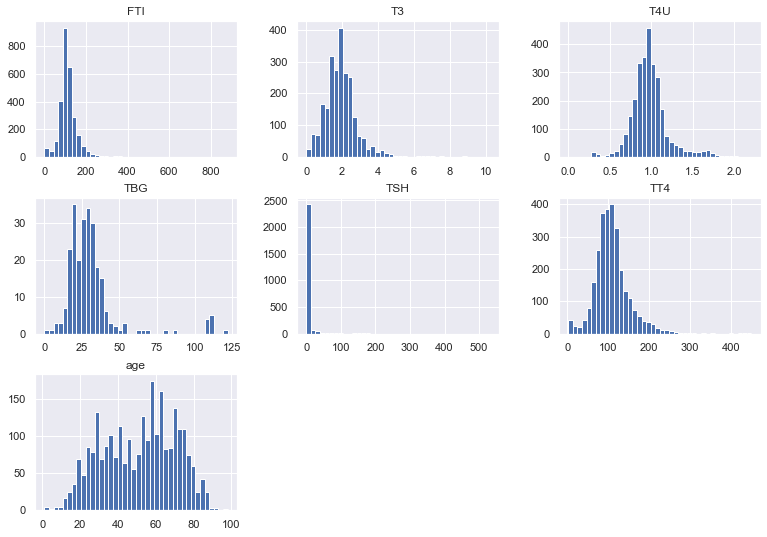

In [97]:
# Histograms
hdata.hist(bins=40, figsize=(13,9))
plt.show()

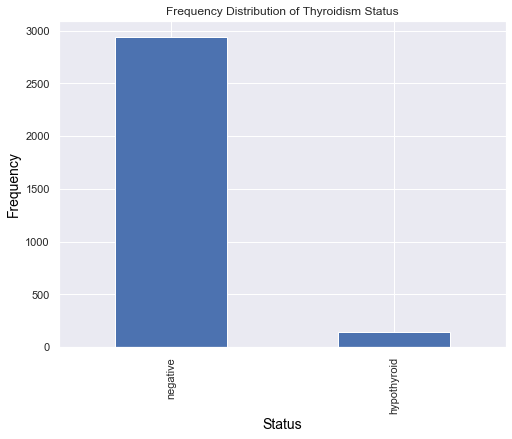

In [98]:
# Checking for the frequency distribution of our target variable Using a bar plot.

fig, ax = plt.subplots(figsize = (8, 6))

hdata['status'].value_counts().plot.bar(title = 'Frequency Distribution of Thyroidism Status')
plt.xlabel('Status', color = 'black', fontsize = 14)
plt.ylabel('Frequency', color = 'black', fontsize = 14)
plt.show()

<li>We observe that most people tested negative for hypothyrodism</li>

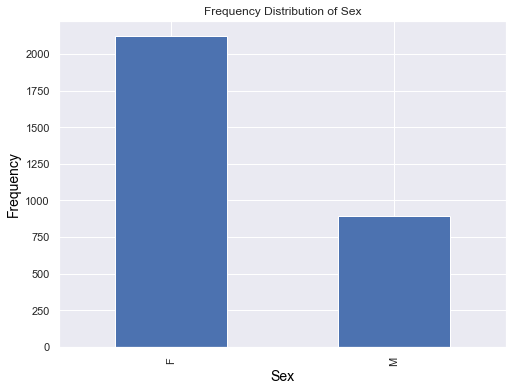

In [99]:
# Checking for the frequency distribution of the sex variable Using a bar plot.

fig, ax = plt.subplots(figsize = (8, 6))

hdata['sex'].value_counts().plot.bar(title = 'Frequency Distribution of Sex')
plt.xlabel('Sex', color = 'black', fontsize = 14)
plt.ylabel('Frequency', color = 'black', fontsize = 14)
plt.show()

<li>Most of the patients are females than males</li>

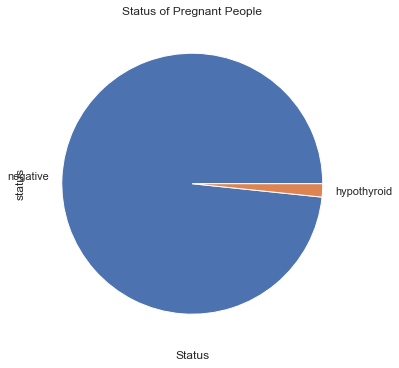

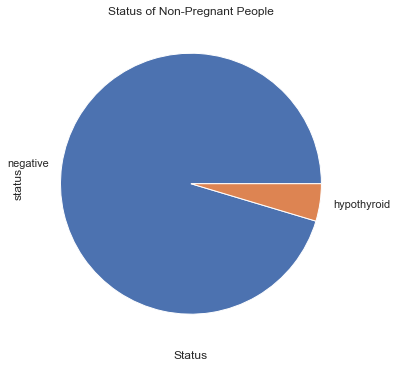

In [100]:
# Investigating the distribution of status of the patients who are pregnant and those who are not.

# Pregnant people
fig, ax = plt.subplots(figsize = (8, 6))
hdata[hdata['pregnant'] == 't']['status'].value_counts().plot.pie(title = 'Status of Pregnant People')
plt.xlabel('Status')
plt.show()

# Non-pregnant people
fig, ax = plt.subplots(figsize = (8, 6))
hdata[hdata['pregnant'] == 'f']['status'].value_counts().plot.pie(title = 'Status of Non-Pregnant People')
plt.xlabel('Status')
plt.show()

<li>The pie charts above, we notice that a more of the non-pregnant women have hypothyroidism as compared to the proportion of the pregnant women.</li>

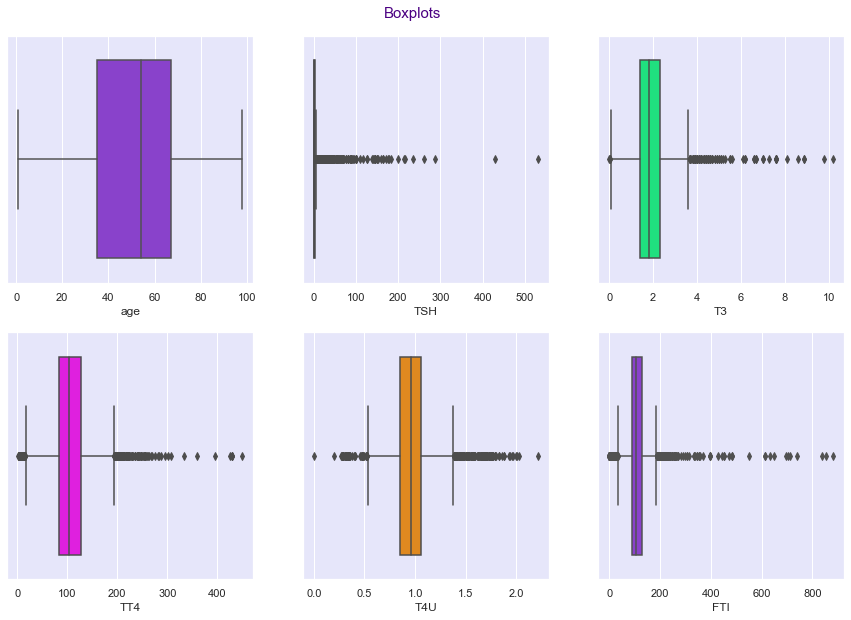

In [101]:
# Boxplots
# Creating a list of columns to check for outliers
# Creating a list of colors
#
col_list = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']
colors = ['blueviolet', 'darkorange', 'springgreen', 'fuchsia', 'darkorange', 'blueviolet', 'springgreen']

# Plotting boxplots of the col_list columns to check for outliers
#
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (15, 10))
plt.suptitle('Boxplots', fontsize = 15, y = 0.92, color = 'indigo')
for ax, data, column, color in zip(axes.flatten(), hdata, col_list, colors):
  sns.boxplot(hdata[column], ax = ax, color = color)
  ax.set_facecolor('lavender') # Setting the background color to lavender

<li>From the boxplot above, we observe that the all the numerical columns contain outliers except for the age column.</li>

#### 5.2 Bivariate Analysis
<b>Bivariate analysis</b> refers to the analysis of two variables to determine relationships between them

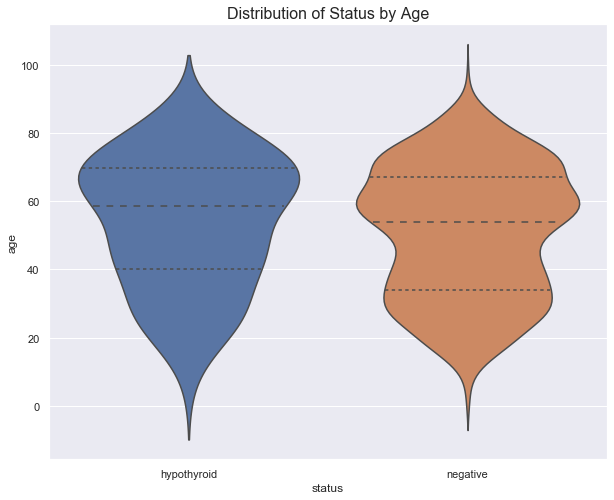

In [102]:
# Violinplots to check for correlation between age and status.
ax = sns.violinplot(x="status", y="age", inner='quartile', data=hdata)
ax.set_title('Distribution of Status by Age', fontsize=16);

<li>We see that the overall shape and distribution of the ages are similar for both status (quartiles very close to each other)</li>
<li>That most people with hypothyroidism are about the ages of 60 years</li>

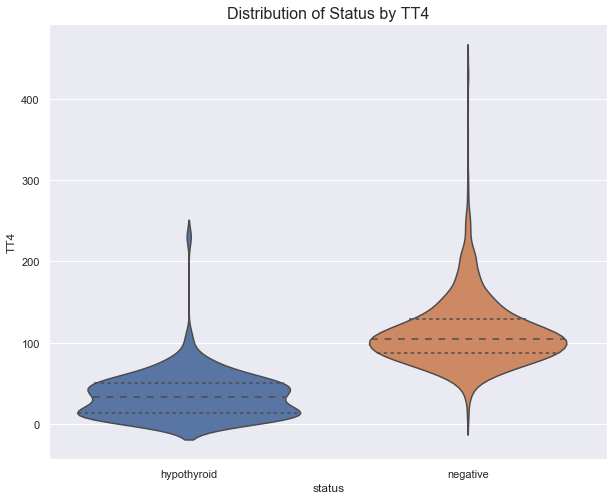

In [103]:
    # Violinplots to check for correlation between TT4 and status.
ax = sns.violinplot(x="status", y="TT4", inner='quartile', data=hdata)
ax.set_title('Distribution of Status by TT4', fontsize=16);

<li>The T4 reflects the amount of thyroxine in the blood.</li>
<li>We can observe that the lower levels of TT4 in the blood is indicative that you ahave hypothyroidsm</li>
<li>A low T4 level could mean a diseased thyroid gland ~ OR ~ a non-functioning pituitary gland which is not stimulating the thyroid to produce T4.</li>

#### Dealing with Missing Values

While using random forest classification algorithms, we will not impute the missing values with estimates of the features  since trees are not affected by missing values instead we will classify the missing values as null in categorical data and 0 in the numeric features so as to maintain the integrity of the raw data.

In [104]:
# Filling the missing values of numeric features
for col in numeric:
  hdata.fillna(0, inplace = True)
  
# For categorical features
categ =  ['sex','on_thyroxine','query_on_thyroxine','on_antithyroid_medication',
       'thyroid_surgery','query_hypothyroid','query_hyperthyroid','pregnant','sick','tumor','lithium',
       'goitre','TSH_measured','T3_measured','TT4_measured','T4U_measured','FTI_measured','TBG_measured']

for i in categ:
  hdata.fillna('null', inplace = True)

In [105]:
# Confirm if any  missing values
hdata.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

Feature Engineering

In [106]:
# Create a dictionary to manually encode the categorical data
dict_data = {"sex": {"M": 1, "F": 0},
              'on_thyroxine': {"t": 1, "f": 0},
               "query_on_thyroxine": {"t": 1, "f": 0},
                "on_antithyroid_medication": {"t": 1, "f": 0},
                "thyroid_surgery": {"t": 1, "f": 0},
                "query_hypothyroid": {"t": 1, "f": 0},
               "query_hyperthyroid": {"t": 1, "f": 0},
                "pregnant": {"t": 1, "f": 0},
                "sick" : {"t": 1, "f": 0},
                "tumor": {"t": 1, "f": 0},
                "lithium": {"t": 1, "f": 0},
                "goitre": {"t": 1, "f": 0},
                 "TSH_measured": {"y": 1, "n": 0},
                 "T3_measured": {"y": 1, "n": 0},
                  "TT4_measured": {"y": 1, "n": 0},
                  "T4U_measured": {"y": 1, "n": 0},
                  "FTI_measured": {"y": 1, "n": 0},
                  "TBG_measured": {"y": 1, "n": 0},
                }
hdata.replace(dict_data, inplace=True)

In [107]:
# Previwing dataset after changes
hdata.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72.0,1,0,0,0,0,0,0,0,...,1,0.6,1,15.0,1,1.48,1,10.0,0,0.0
1,hypothyroid,15.0,0,1,0,0,0,0,0,0,...,1,1.7,1,19.0,1,1.13,1,17.0,0,0.0
2,hypothyroid,24.0,1,0,0,0,0,0,0,0,...,1,0.2,1,4.0,1,1.00,1,0.0,0,0.0
3,hypothyroid,24.0,0,0,0,0,0,0,0,0,...,1,0.4,1,6.0,1,1.04,1,6.0,0,0.0
4,hypothyroid,77.0,1,0,0,0,0,0,0,0,...,1,1.2,1,57.0,1,1.28,1,44.0,0,0.0


### 6. Implementing the Solution
#### a) Random Forest

In [108]:
# Selecting the independent and target variables
X = hdata.drop('status', axis = 1)
y = hdata.status

# Splitting the data into training and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Modeling

forest = RandomForestClassifier()
forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)

comparison_frame = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})

comparison_frame.head(10)

,Actual,Predicted
1188,negative,negative
1205,negative,negative
713,negative,negative
2791,negative,negative
1318,negative,negative
1328,negative,negative
1012,negative,negative
2604,negative,negative
2583,negative,negative
1250,negative,negative


In [109]:
# Measuring the accuracy of the model
#
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9870550161812298


<li>The random forest model has a 99.19%</li>

#### Parameter Tuning

In [110]:
# Previewing the parameters to tune
#
RandomForestClassifier()

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [111]:
# Hyperparameter tuning the RandomForestClassifier

from sklearn.model_selection import GridSearchCV

params = {'n_estimators' : [10, 20, 30, 50, 100], 
          'max_depth' : [1, 2, 3, 4, 5]}

kfold = KFold(n_splits=10, shuffle=True)
forest = RandomForestClassifier()

search = GridSearchCV(forest, param_grid=params, scoring = 'accuracy', cv = kfold)

search.fit(X, y)
search.best_params_

{'max_depth': 5, 'n_estimators': 50}

In [112]:
# Fitting the best parameters to the model and observe the performance

forest = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', max_depth = 5)
forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)

# Evaluating the model performance
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9902912621359223


<li>The accuracy is still 99.03%</li>


In [113]:
# Visualizing a tree from the random forest
dot_data = StringIO()

# Picking a specific tree from the forest
rand_tree = forest.estimators_[2]

export_graphviz(rand_tree, out_file = dot_data, filled = True, rounded = True,
              special_characters = True, feature_names = X.columns)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('hypo_forest.png')
Image(graph.create_png())

InvocationException: GraphViz's executables not found

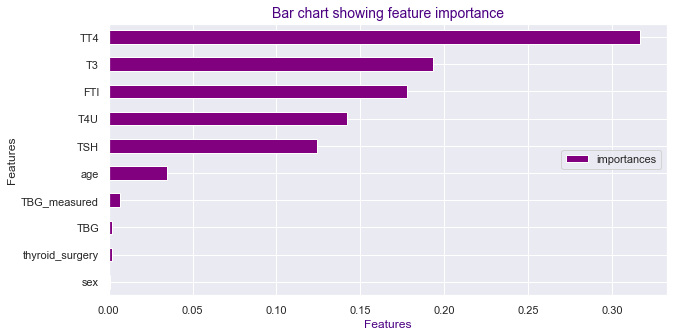

In [114]:
# Checking for the most important features that contribute most in predicting the target
# Creating a dataframe of features and their respective importances
impo_df = pd.DataFrame({'Features': X.columns, 'importances':rand_tree.feature_importances_}).sort_values(by='importances', ascending=False).set_index('Features')

# Creating a bar chart of feature importance in descending order
impo_df = impo_df[:10].sort_values(by = 'importances', ascending = True)
impo_df.plot(kind = 'barh', figsize = (10,5), color = 'purple')
plt.legend(loc = 'center right')
plt.title('Bar chart showing feature importance', color = 'indigo', fontsize = 14)
plt.xlabel('Features', fontsize = 12, color = 'indigo')
plt.show()

The top 5 imprtant features are:
<li>TT4</li>
<li>T3</li>
<li>FTI</li>
<li>T4U</li>
<li>TSH</li>

#### Adaboost
<li>Optimizing the RandomForestClassifier Using Adaboost</li>

In [115]:
#Adaboost Trees
ad_boost = AdaBoostClassifier(RandomForestClassifier(max_depth = 4),
                          n_estimators=300, random_state = 0)

ad_boost = ad_boost.fit(X_train, y_train)
ad_pred = ad_boost.predict(X_test)

# Checking the accuracy of the prediction

print("Accuracy:", metrics.accuracy_score(y_test, ad_pred))

Accuracy: 0.9919093851132686


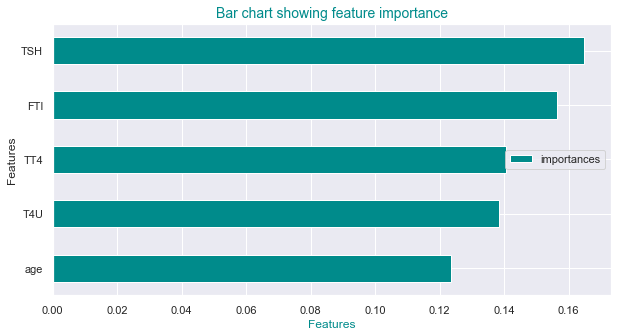

In [116]:
# Checking for the most important features that contribute most in predicting the target
# Creating a dataframe of features and their respective importances
ad_df = pd.DataFrame({'Features': X.columns, 'importances':ad_boost.feature_importances_}).sort_values(by='importances', ascending=False).set_index('Features')

# Creating a bar chart of feature importance in descending order
ad_df = ad_df[:5].sort_values(by = 'importances', ascending = True)
ad_df.plot(kind = 'barh', figsize = (10,5), color = 'darkcyan')
plt.legend(loc = 'center right')
plt.title('Bar chart showing feature importance', color = 'darkcyan', fontsize = 14)
plt.xlabel('Features', fontsize = 12, color = 'darkcyan')
plt.show()

The 5 top most important features in predicting the outcomes in the Adaboost model are:
<li>TSH</li>
<li>FTI</li>
<li>TT4</li>
<li>T4u</li>
<li>Age</li>

In [117]:
# Imputing the missing values
hdata['age'].fillna(hdata['age'].mean(), inplace = True)
hdata['sex'].fillna(0, inplace = True)
hdata['TSH'].fillna(hdata['TSH'].mean(), inplace = True)
hdata['T3'].fillna(hdata['T3'].median(), inplace = True)
hdata['TT4'].fillna(hdata['TT4'].median(), inplace = True)
hdata['FTI'].fillna(hdata['FTI'].median(), inplace = True)
hdata['T4U'].fillna(hdata['T4U'].mean(), inplace = True)
hdata['TBG'].fillna(hdata['TBG'].mean(), inplace = True)

### Support Vector Machine Model

In [118]:
# Selecting the independent variables and the target variable
#
X = hdata[['FTI', 'TSH']].values
y = np.where(hdata.status == 'hypothyroid', 1, 0)

# Instantiating and creating a list of models for iteration
#
poly = SVC(kernel='poly')
linear = SVC(kernel = 'linear')
rbf = SVC(kernel ='rbf')

# Creating a list of the models and model names
#
models = [poly, linear, rbf]
model_names = ['Polynomial', 'Linear', 'Rbf']
# Creating a function that trains a model and returns its accuracy together with the model
#
def predictor(model, X, y):
  # Splitting the data into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
  
  # Standardising the data
  from sklearn.preprocessing import StandardScaler
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)
  
  # Training the model and making predictions
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  
  # Measuring the accuracy of the model
  f1 = f1_score(y_test, y_pred)
  acc = accuracy_score(y_test, y_pred)
  
  # Returning the accuracy and the model
  return acc, f1, model

# Getting the accuracies of the models  using a for loop
#
for model, name in zip(models, model_names):
  print(f'The accuracy score of {name:<10} is: {predictor(model, X, y)[0]} and the f1 score is: {predictor(model, X, y)[1]}')

The accuracy score of Polynomial is: 0.9827213822894169 and the f1 score is: 0.7500000000000001
The accuracy score of Linear     is: 0.9794816414686826 and the f1 score is: 0.7164179104477612
The accuracy score of Rbf        is: 0.9848812095032398 and the f1 score is: 0.7941176470588235


The best performing Support Vector Classifier kernel is RBF. It has an f1 score of approximately of 80% which is more than that of polynomial and linear